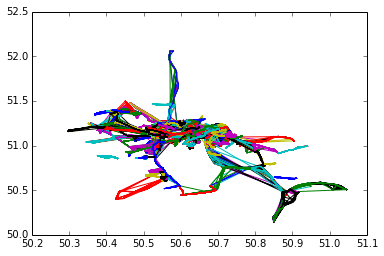

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas
from sklearn.cluster import KMeans

data = pandas.read_csv('data.tsv', sep="\t", header=None, names=['date', 'id', 'type', 'hash', 'latitude', 'longitude'])

for id in data["id"].unique():
    t = data[data["id"] == id]
    plt.plot(t['latitude'], t['longitude'])       

    

In [66]:
route_to_stops_count = pandas.read_csv('route_to_stops_count.tsv', sep="\t", header=None, names=['hash', 'num'])
x = route_to_stops_count[route_to_stops_count["hash"] == 86]
k_means = KMeans(n_clusters = x["num"][0])
data_bus = data[data["hash"] == 86]
coor = data_bus[['latitude', 'longitude']]
k_means.fit(coor)


end calc


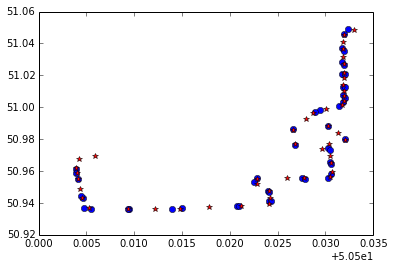

In [67]:
debug = pandas.read_csv('debug.tsv', sep="\t", header=None, names=['type', 'hash', 'latitude', 'longitude'])
t = debug[debug["hash"] == 86]
z = t[debug["type"] == "bus"]
plt.plot(z['latitude'], z['longitude'], 'o') 
a = []
for i in range(x["num"][0]):
    a.append(k_means.cluster_centers_[i])

plt.plot(*zip(*a), marker='*', color='r', ls='')